# Load Data

In [1]:
import os
base_path = "../data/test_data/"
# Liste von Namen
names_list = ["Christoph_Haerdl", "Johannnes_Rothe", "Paul_Hannig",
              "Leon_Hagn", "Roland_Hildwein", "Adem_wannes",
              "David_Schneid", "christoph_käsweber", "Emil_Berent",
              "Mike_Figas", "Lorenz_Falcioni", "Markus_Schmidhuber",
              "Georg_Mages", "Pechtl_Fabian", "Philipp_Christoph",]

# Liste von Pfaden
end_paths = ["0_Christoph_Haerdl.tsv", "1_Johannes_Rothe.tsv", "2_Paul_Hannig.tsv",
              "3_Leon_Hagn.tsv", "4_Roland_Hildwein.tsv", "5_Adem_wannes.tsv",
              "6_David_Schneid.tsv", "7_christoph_käsweber.tsv", "8_Emil_Berent.tsv",
              "9_Mike_Figas.tsv", "10_Lorenz_Falcioni.tsv", "11_Markus_Schmidhuber.tsv",
              "12_Georg_Mages.tsv", "13_Pechtl_Fabian.tsv", "14_Philipp_Christoph.tsv"]

full_paths = []

for end_path in end_paths:
    full_path = os.path.join(base_path, end_path)
    full_paths.append(full_path)

from set_eye_tracking_cooking_recipes.entities.test import Test
from set_eye_tracking_cooking_recipes.entities.test_data import TestData
from set_eye_tracking_cooking_recipes.entities.test_person import TestPerson
from set_eye_tracking_cooking_recipes.entities.test_aoi_metrics import TestAoiMetrics

# Liste für die Test-Klassen
test_classes = []

for name, full_path in zip(names_list, full_paths):
    test_data = TestData(file_path=full_path)
    test_aoi_metrics = TestAoiMetrics(file_path="../data/set_eye_tracking_cooking_recipes_Metrics.tsv", id=test_data.id, Testperson=name)
    test_person = TestPerson(surveys_file_path="../data/surveys.csv", id=test_data.id)
    test = Test(test_person=test_person, test_data=test_data, test_aoimetrics=test_aoi_metrics)
    
    # Hinzufügen der erstellten Klasse zur Liste
    test_classes.append(test)

C:\Users\micha\studium\git-studium\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:45: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
C:\Users\micha\studium\git-studium\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:45: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
C:\Users\micha\studium\git-studium\set_eye_tracking_cooking_recipes\set_eye_tracking_cooking_recipes\entities\test_data.py:45: DtypeWarning: Columns (37,38,65,66,67,68,69,70,72,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter='\t')
C:\Users\micha\studium\git-studium\set_eye_tracking_cooking_recipes\set_eye_tracking_coo

# Research Questions

## Research Question: Do participants generally consider the image of a dish as the first visual anchor?

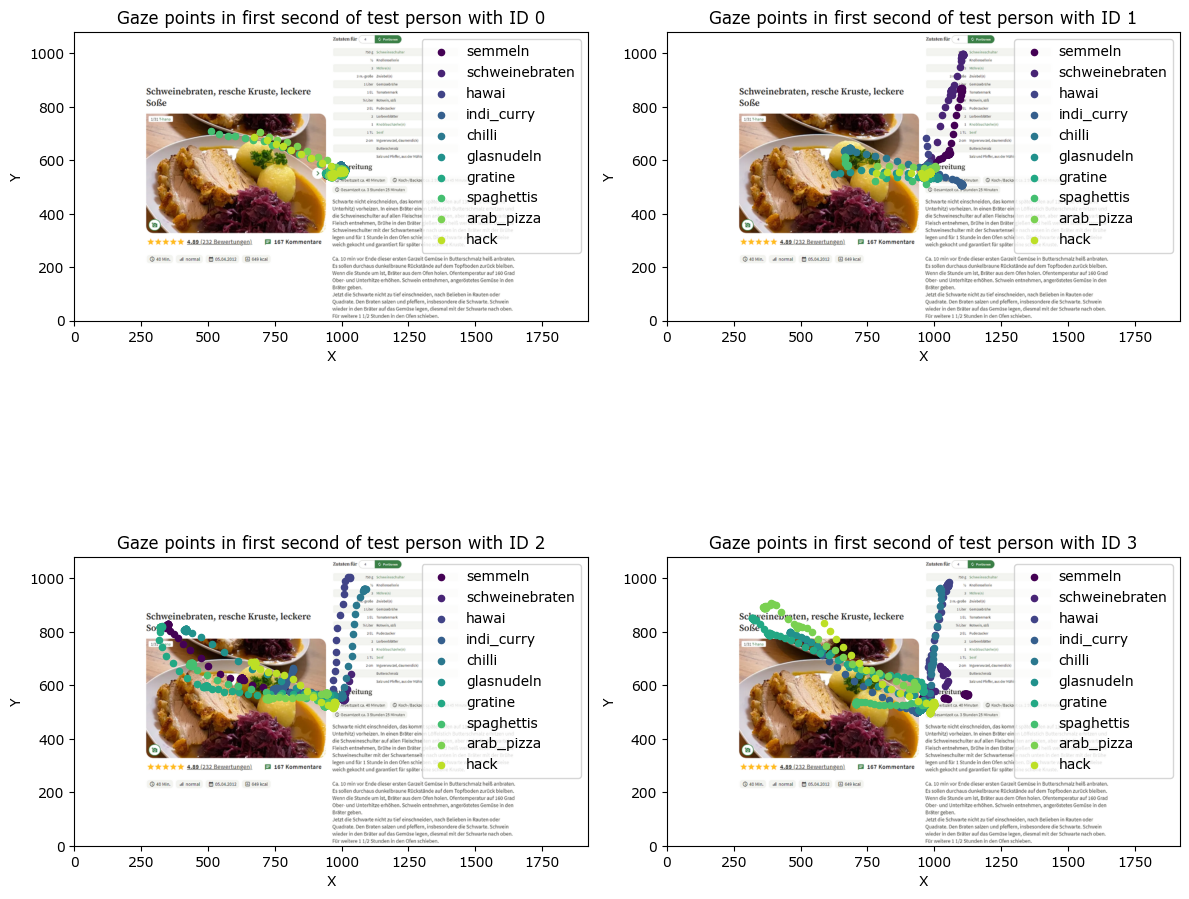

In [2]:
Test.plot_first_second_of_stimuli_visit_list(list_of_tests=test_classes[:4])

## Do vegetarians view non-vegetarian dishes differently than vegetarian dishes?

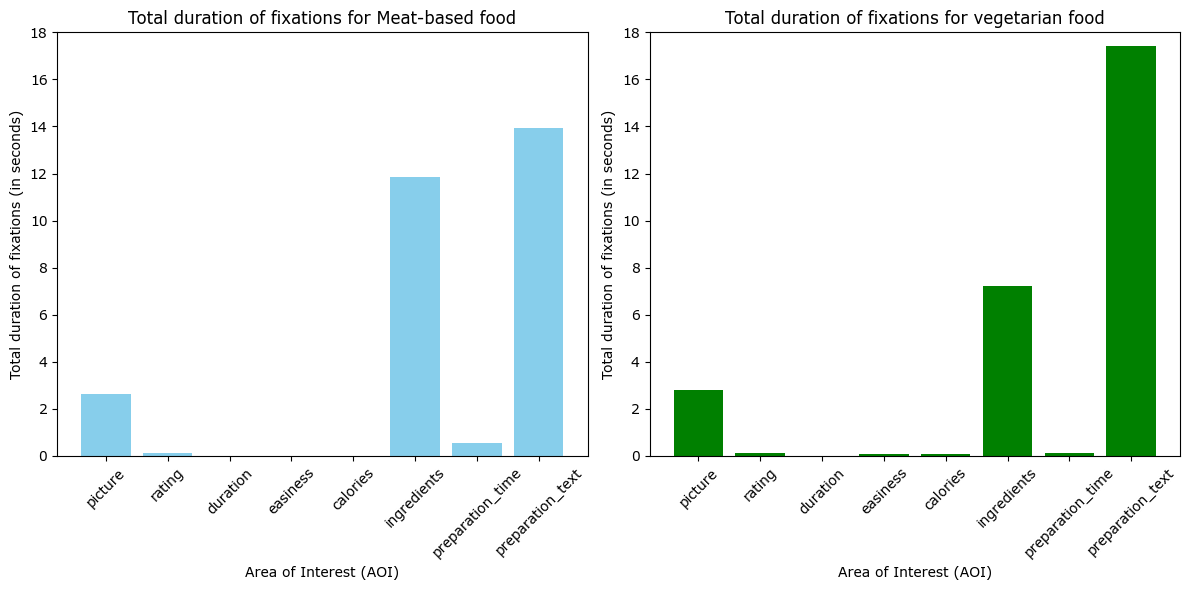

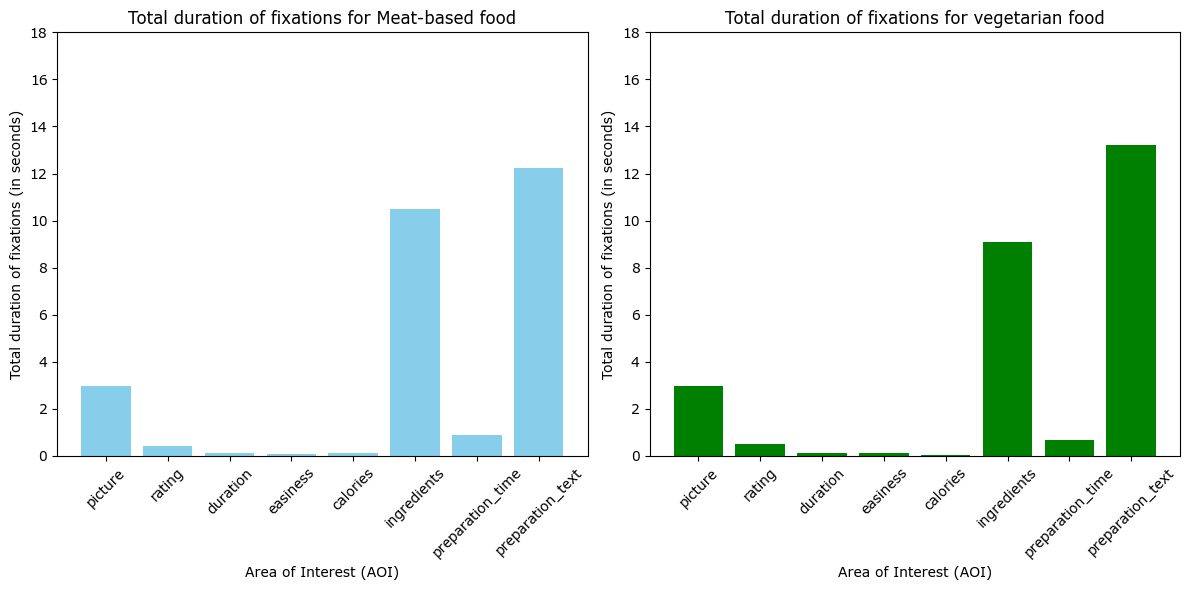

In [3]:
Test.print_bar_plot_vegeatrian(list_of_tests=test_classes, isvegetarian=True)
Test.print_bar_plot_vegeatrian(list_of_tests=test_classes, isvegetarian=False)

## Does the interest in healthy eating influence participants' attention to the specified calories (kcal) in cooking recipes?

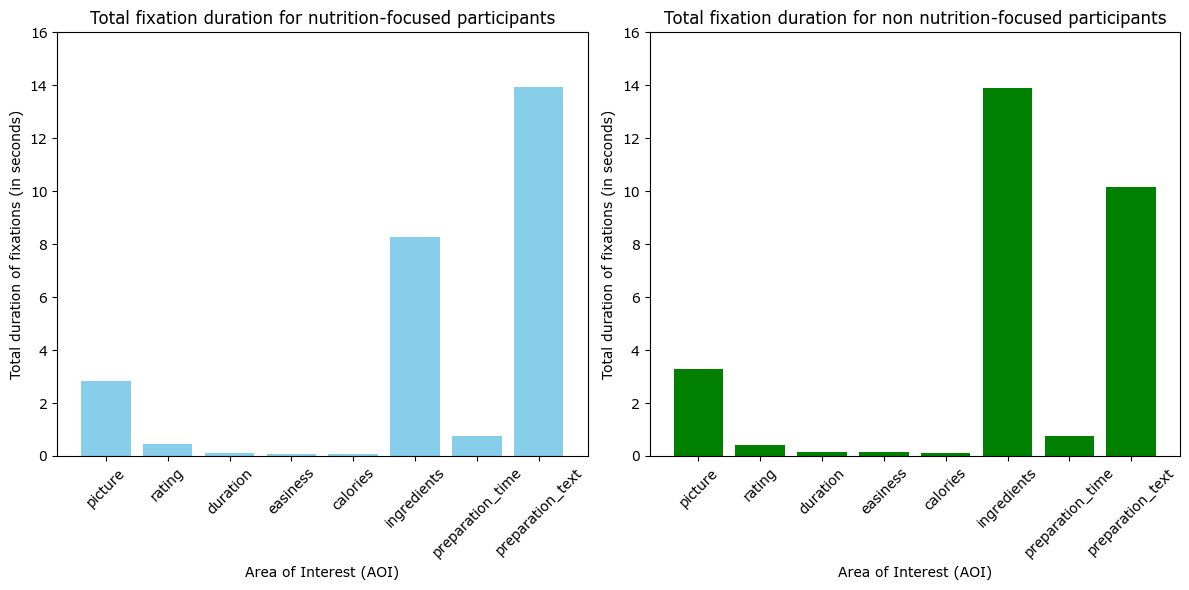

In [4]:
Test.plot_mean_of_nutrition(list_of_tests=test_classes)

## Does cooking experience affect how people follow the recipe steps?

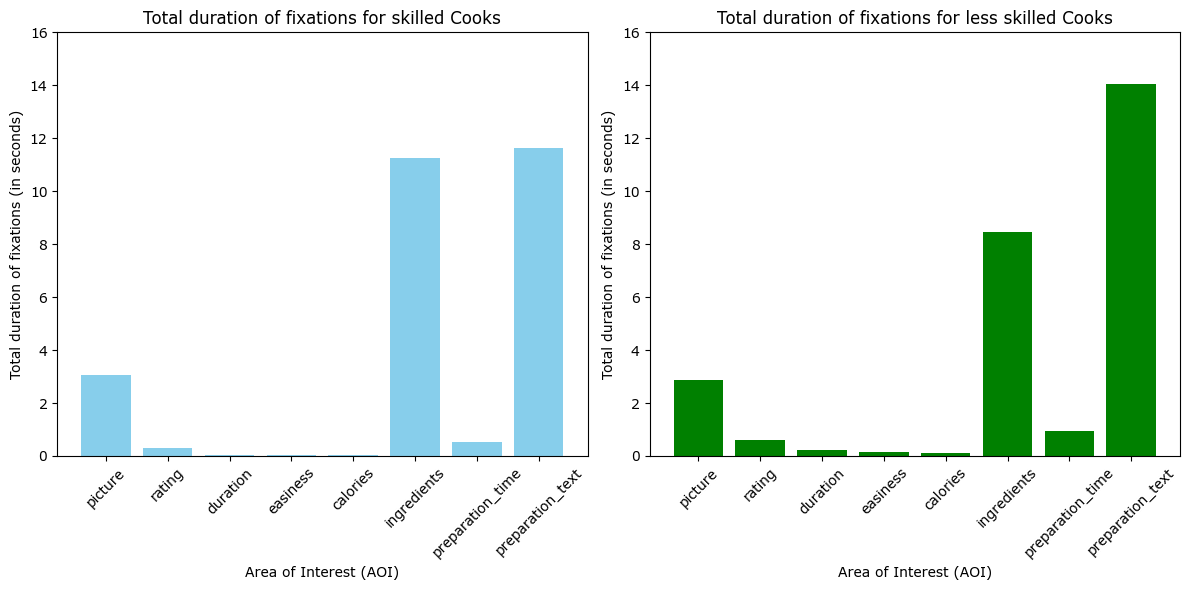

In [5]:
Test.plot_bar_plot_goodvsbad_cooks(list_of_tests=test_classes)

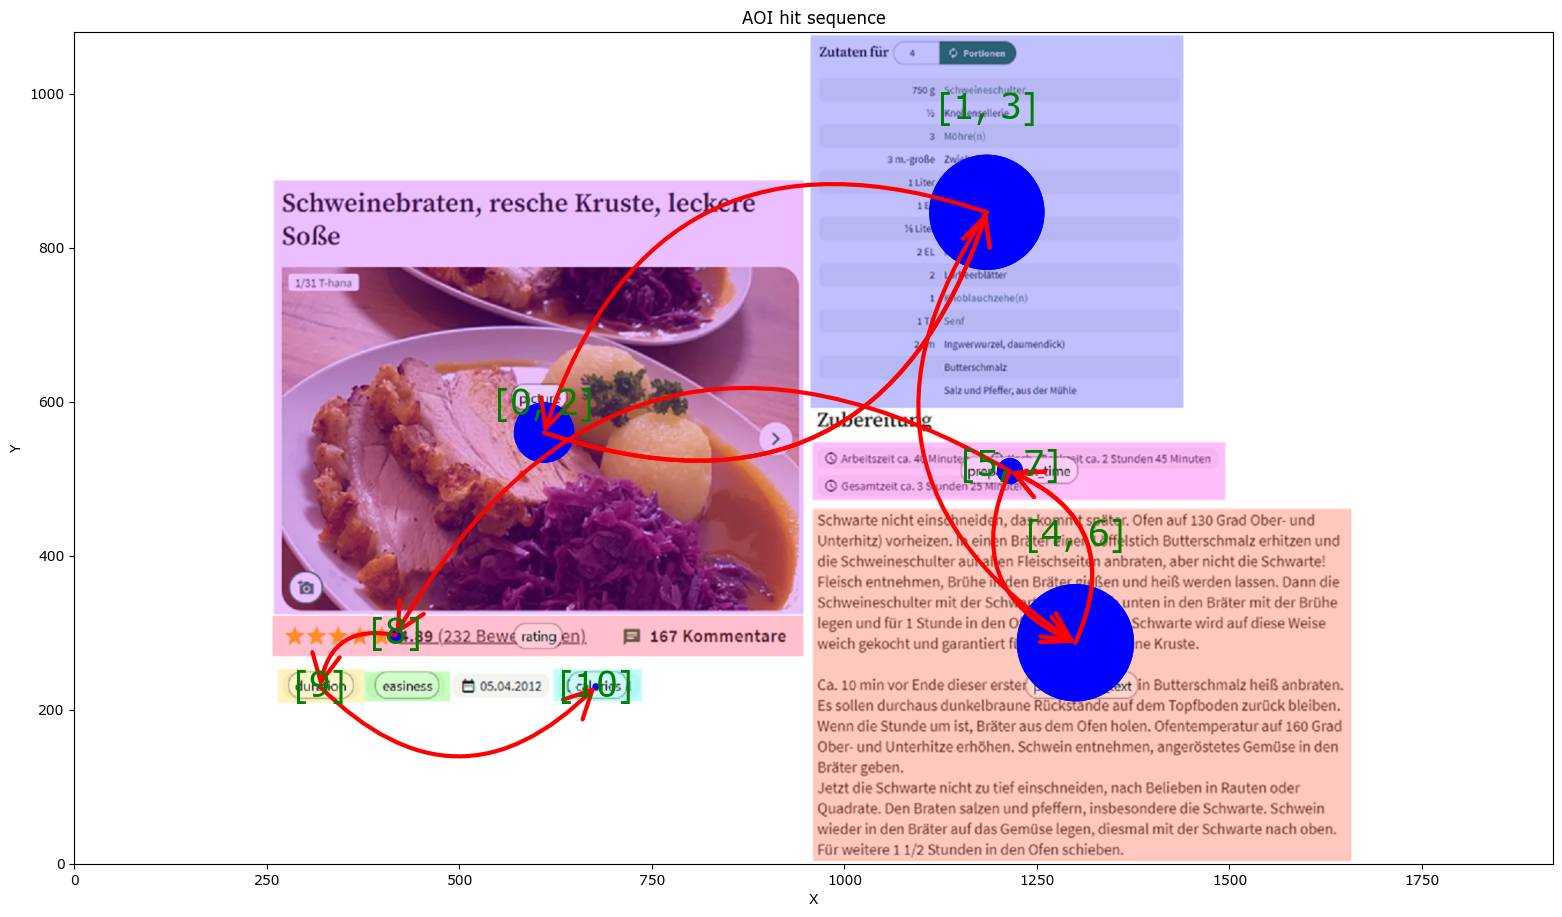

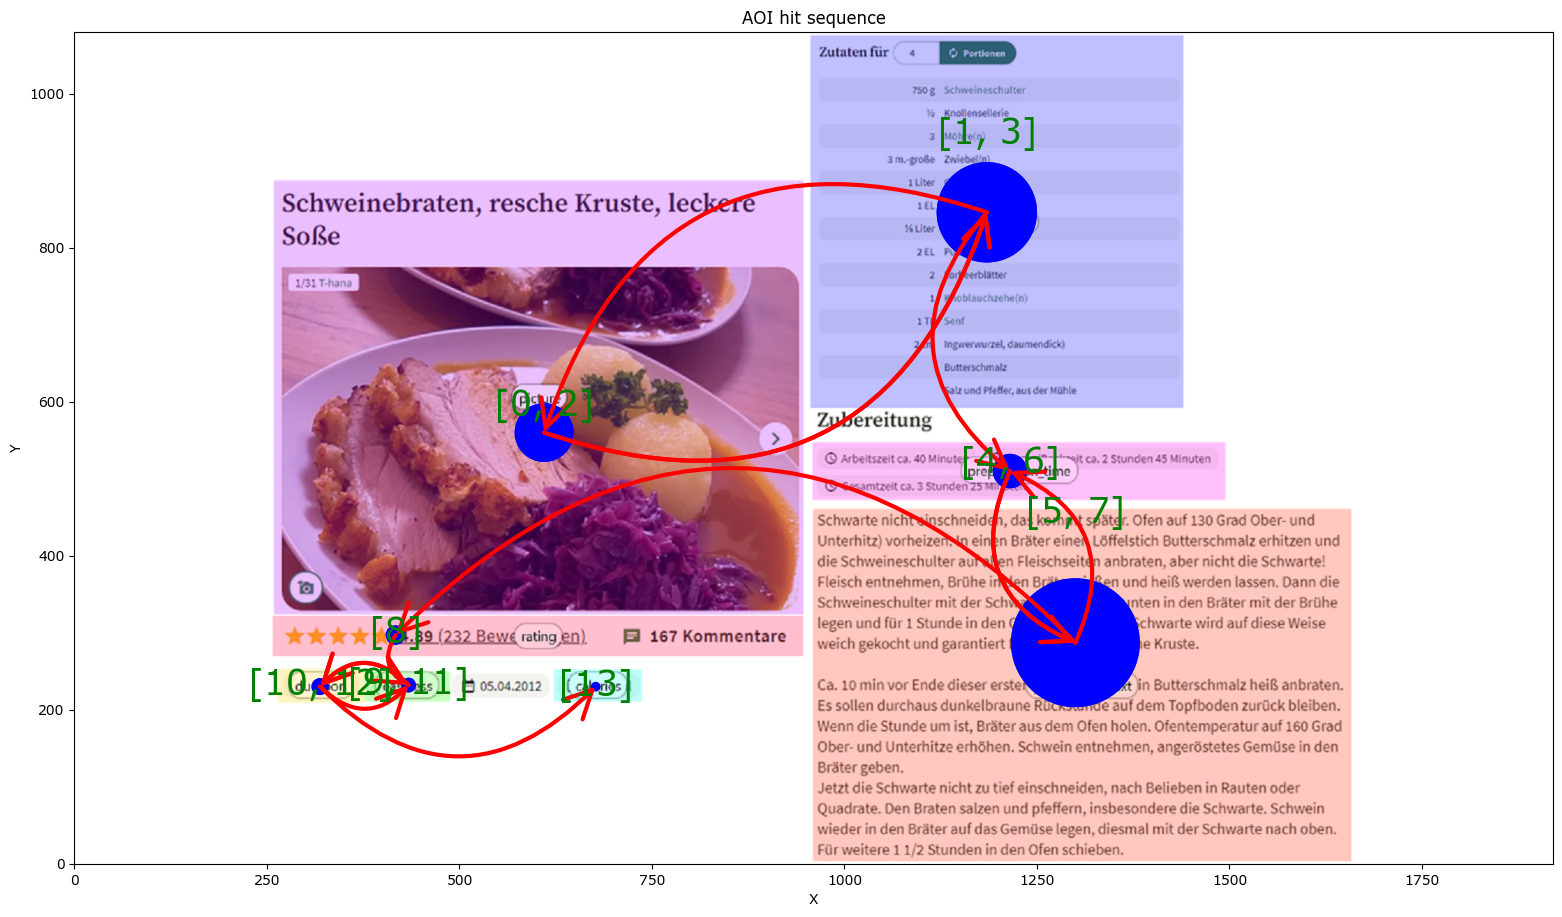

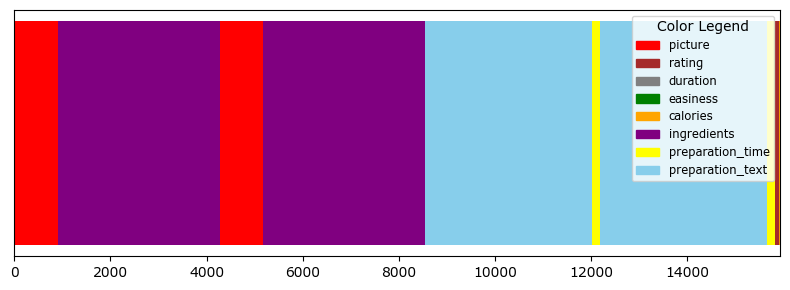

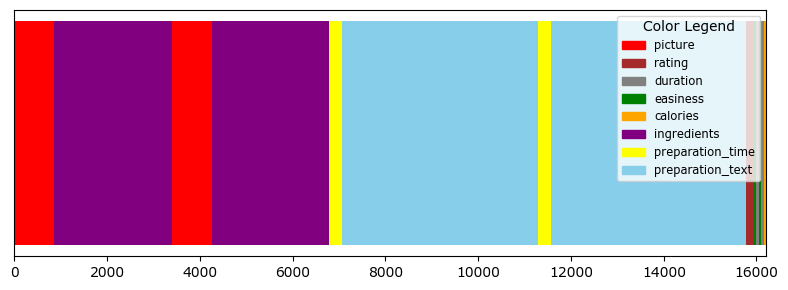

In [6]:
good_cooking_tests = []
bad_cooking_tests = []

for test in test_classes:
    if test.test_person.cooking_experience:
        good_cooking_tests.append(test)
    else:
        bad_cooking_tests.append(test)

good_cooking_aoi_sequences = []
bad_cooking_aoi_sequences = []

for test in good_cooking_tests:
    aoi_sequences, _ = test.test_data.get_aoi_times()
    good_cooking_aoi_sequences += aoi_sequences


for test in bad_cooking_tests:
    aoi_sequences, _ = test.test_data.get_aoi_times()
    bad_cooking_aoi_sequences += aoi_sequences

average_good_cook_sequence = TestData.make_average_aoi_sequence(good_cooking_aoi_sequences)
average_bad_cook_sequence = TestData.make_average_aoi_sequence(bad_cooking_aoi_sequences)


Test.plot_aoi_sequence(average_good_cook_sequence)
Test.plot_aoi_sequence(average_bad_cook_sequence)
Test.scarf_plot_out_of_one_sequence(average_good_cook_sequence)
Test.scarf_plot_out_of_one_sequence(average_bad_cook_sequence)